In [1]:
import pandas as pd

df = pd.read_csv('sales_record.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   Customer_ID                 10000 non-null  object 
 2   Age                         10000 non-null  int64  
 3   Gender                      10000 non-null  object 
 4   Income                      10000 non-null  int64  
 5   Location                    10000 non-null  object 
 6   Transaction_count           10000 non-null  int64  
 7   Average_Transaction_Amount  10000 non-null  float64
 8   Total_Spent                 10000 non-null  float64
 9   Last_purchase_date          10000 non-null  object 
 10  Product_category            10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [2]:
df.head()

,Unnamed: 0,Customer_ID,Age,Gender,Income,Location,Transaction_count,Average_Transaction_Amount,Total_Spent,Last_purchase_date,Product_category
0,0,CUST1000,56,Male,84235,Oshodi_isolo,8,47.285409,378.283273,2025-03-14 09:16:21.684796,Electronics
1,1,CUST1001,69,Female,88565,Alimosho,8,152.264884,1218.119073,2024-10-08 09:16:21.684833,Electronics
2,2,CUST1002,46,Female,85342,Ikeja,5,336.016831,1680.084157,2024-11-22 09:16:21.684843,Fashion
3,3,CUST1003,32,Female,72723,Ajeromi_ifelodun,5,208.311691,1041.558454,2024-08-02 09:16:21.684848,Fashion
4,4,CUST1004,60,Male,65572,Ifako_ijaiye,4,358.239626,1432.958504,2024-08-09 09:16:21.684853,Home Goods


# Data Preprocessing

### Remove unnecessary columns

In [6]:
df_cleaned = df.drop(columns=["Unnamed: 0", "Customer_ID", "Last_purchase_date"])

### Encode categorical variables

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

labels_encoder = {}
for col in ["Gender", "Location", "Product_category"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    labels_encoder[col] = le

### Normalize numerical features

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

df_scaled[:5]

array([[ 0.8356711 ,  1.00440972,  0.35420745,  1.16074092,  1.14837648,
        -1.53845052, -0.91025221, -0.70398788],
       [ 1.7075171 , -0.99560964,  0.5189506 , -0.79686174,  1.14837648,
        -0.78278968, -0.09509938, -0.70398788],
       [ 0.16502033, -0.99560964,  0.39632539, -0.01382067, -0.0187914 ,
         0.53988935,  0.35328844,  0.00689557],
       [-0.77389075, -0.99560964, -0.08378866, -1.18838227, -0.0187914 ,
        -0.37935485, -0.26647084,  0.00689557],
       [ 1.1039314 ,  1.00440972, -0.35586217, -0.40534121, -0.40784736,
         0.69985296,  0.11342587,  1.42866246]])

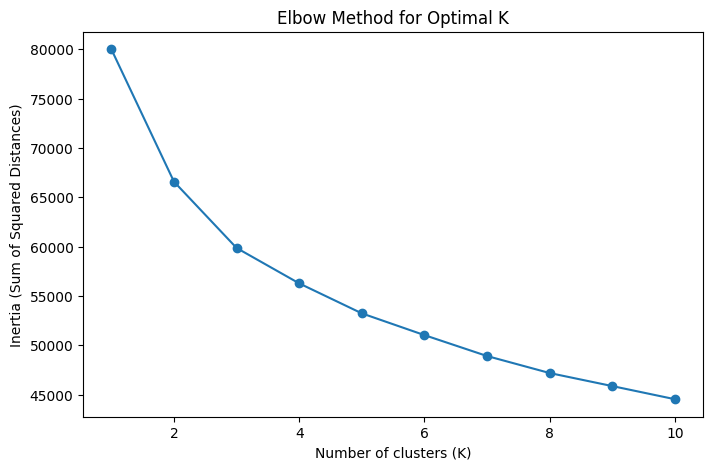

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

### Visualize segmentation

In [21]:
from sklearn.decomposition import PCA

In [22]:
# Apply K_means clustering with k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(df_scaled)

In [23]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_cleaned["PCA1"] = df_pca[:, 0]
df_cleaned["PCA2"] = df_pca[:, 1]

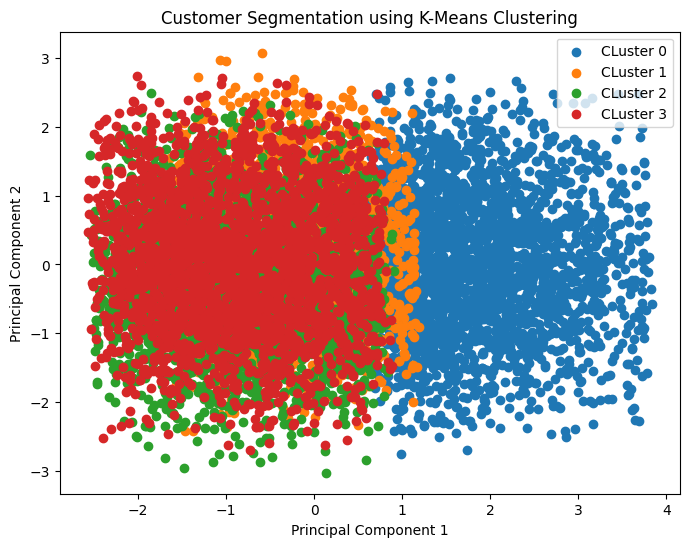

In [28]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"CLuster {cluster}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend()
plt.show()

In [29]:
# Analyze the characteristics of each cluster
cluster_summary = df_cleaned.groupby("Cluster").mean()
cluster_summary

,Age,Gender,Income,Location,Transaction_count,Average_Transaction_Amount,Total_Spent,Product_category,PCA1,PCA2
Cluster,,,,,,,,,,
0,43.432166,0.511670,74676.986871,3.978118,7.310722,378.070268,2728.808040,1.930343,1.831009,0.011505
1,43.510963,0.485224,75404.202574,3.983794,2.448046,386.063991,955.041335,2.062917,-0.284057,0.203927
2,44.021901,1.000000,74580.834572,4.163082,4.852953,148.287440,705.028851,2.028940,-0.851053,-0.222498
3,43.201306,0.000000,75139.050711,4.011525,4.952747,147.648931,719.229218,1.956973,-0.863823,0.042083


In [30]:
df_cleaned

,Age,Gender,Income,Location,Transaction_count,Average_Transaction_Amount,Total_Spent,Product_category,Cluster,PCA1,PCA2
0,56,1,84235,7,8,47.285409,378.283273,1,2,-0.870250,0.758046
1,69,0,88565,2,8,152.264884,1218.119073,1,3,0.065977,0.645043
2,46,0,85342,4,5,336.016831,1680.084157,2,1,0.488273,0.567909
3,32,0,72723,1,5,208.311691,1041.558454,2,3,-0.387803,-0.906088
4,60,1,65572,3,4,358.239626,1432.958504,4,1,0.248884,-0.022392
...,...,...,...,...,...,...,...,...,...,...,...
9995,55,1,102836,8,4,450.090238,1800.360952,3,1,0.798806,1.935588
9996,51,0,117719,4,7,373.922872,2617.460101,3,0,1.623567,1.546701
9997,57,0,63733,7,4,223.683703,894.734813,2,3,-0.661916,0.849037
9998,64,1,37444,7,2,285.847583,571.695165,1,1,-0.978553,0.168866


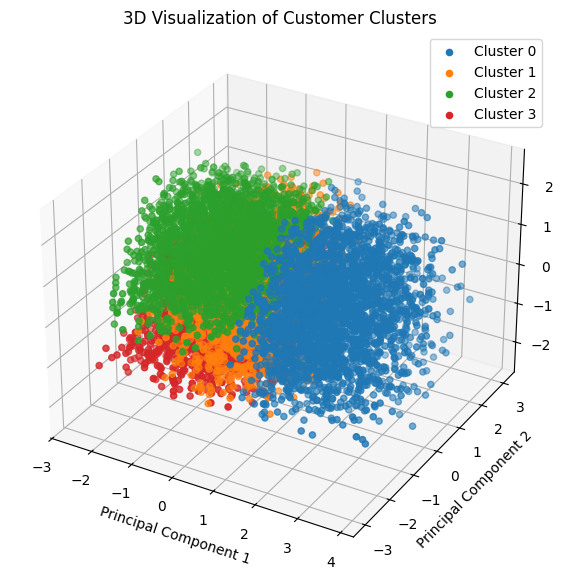

In [31]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
df_cleaned["PCA1"] = df_pca[:, 0]
df_cleaned["PCA2"] = df_pca[:, 1]
df_cleaned["PCA3"] = df_pca[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster in 3D space
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned["Cluster"] == cluster]
    ax.scatter(cluster_data["PCA1"], cluster_data["PCA2"], cluster_data["PCA3"], label=f"Cluster {cluster}")

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of Customer Clusters")
ax.legend()
plt.show()